In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'clean_data_v1.csv'
data = pd.read_csv(file, index_col = 0)
data.head()

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectGender: Male,SubjectGender: Other,SubjectEthnicity: Asian,SubjectEthnicity: Black,SubjectEthnicity: Chinese,SubjectEthnicity: Unknown,SubjectEthnicity: Mixed,SubjectEthnicity: Other,SubjectEthnicity: White,Was Force Needed?
0,2020-04-01,00:12:00,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2020-04-01,01:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020-04-01,03:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2020-04-01,04:25:00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,2020-04-01,04:12:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact Factor: Other
Reason for Force: Protect s

# Analyze total main duties recorded

In [23]:
duty = data[['MainDuty: AFO',
'MainDuty: ARV',
'MainDuty: CID',
'MainDuty: CTSFO',
'MainDuty: Custody',
'MainDuty: Dog handler duty',
'MainDuty: Foot patrol',
'MainDuty: Mobile patrol',
'MainDuty: Mounted section duties',
'MainDuty: Off duty',
'MainDuty: Other',
'MainDuty: PSU/Public order',
'MainDuty: Roads policing',
'MainDuty: Surveillance']]
duty.head()

,MainDuty: AFO,MainDuty: ARV,MainDuty: CID,MainDuty: CTSFO,MainDuty: Custody,MainDuty: Dog handler duty,MainDuty: Foot patrol,MainDuty: Mobile patrol,MainDuty: Mounted section duties,MainDuty: Off duty,MainDuty: Other,MainDuty: PSU/Public order,MainDuty: Roads policing,MainDuty: Surveillance
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
totals = []
names = []
for i in duty.columns:
    names.append(i)
    totals.append(np.sum(duty[i]))

duty_totals = pd.DataFrame(data = [names,totals]).T
duty_totals.rename(columns = {0: 'duty', 1:'totals'}, inplace = True)
duty_totals.sort_values(by = 'totals', ascending = False, inplace = True)
duty_totals['duty'] = duty_totals['duty'].map({
                                            'MainDuty: AFO': 'AFO',
                                        'MainDuty: ARV': 'ARV',
                                        'MainDuty: CID': 'CID',
                                        'MainDuty: CTSFO': 'CTSFO',
                                        'MainDuty: Custody': 'Custody',
                                        'MainDuty: Dog handler duty': 'Dog handler duty',
                                        'MainDuty: Foot patrol': 'Foot Patrol',
                                        'MainDuty: Mobile patrol': 'Mobile Patrol',
                                        'MainDuty: Mounted section duties': 'Mounted section duties',
                                        'MainDuty: Off duty': 'Off Duty',
                                        'MainDuty: Other': 'Other',
                                        'MainDuty: PSU/Public order': 'PSU/Public Order',
                                        'MainDuty: Roads policing': 'Roads policing',
                                        'MainDuty: Surveillance': 'Surveillance'
                                        })
duty_totals

,duty,totals
7,Mobile Patrol,112431
6,Foot Patrol,8736
10,Other,7214
4,Custody,5741
1,ARV,3690
12,Roads policing,3443
11,PSU/Public Order,3339
2,CID,1568
5,Dog handler duty,523
3,CTSFO,379


In [38]:
piechart = duty_totals.iloc[:6,:]
piechart = piechart.append({'duty': 'Remaining 8 categories', 'totals': 6640}, ignore_index = True)
piechart

,duty,totals
0,Mobile Patrol,112431
1,Foot Patrol,8736
2,Other,7214
3,Custody,5741
4,ARV,3690
5,Roads policing,3443
6,Remaining 8 categories,6640


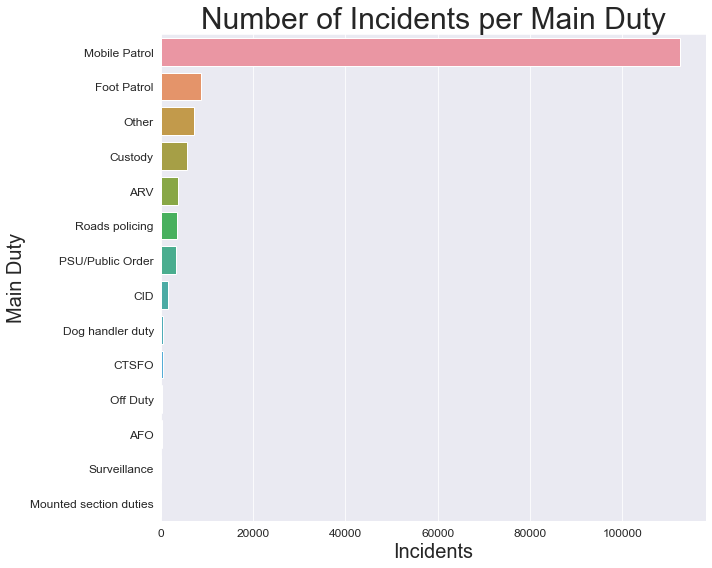

In [31]:
plt.figure(figsize=(10,8))
ax = sns.set_style('darkgrid')
ax = sns.barplot(y = duty_totals['duty'], x = duty_totals['totals'])
ax.set_ylabel('Main Duty', fontsize = 20)
ax.set_xlabel('Incidents', fontsize = 20)
ax.axes.set_title('Number of Incidents per Main Duty', fontsize = 30)
plt.xticks()
plt.tick_params(labelsize = 12)
plt.tight_layout()

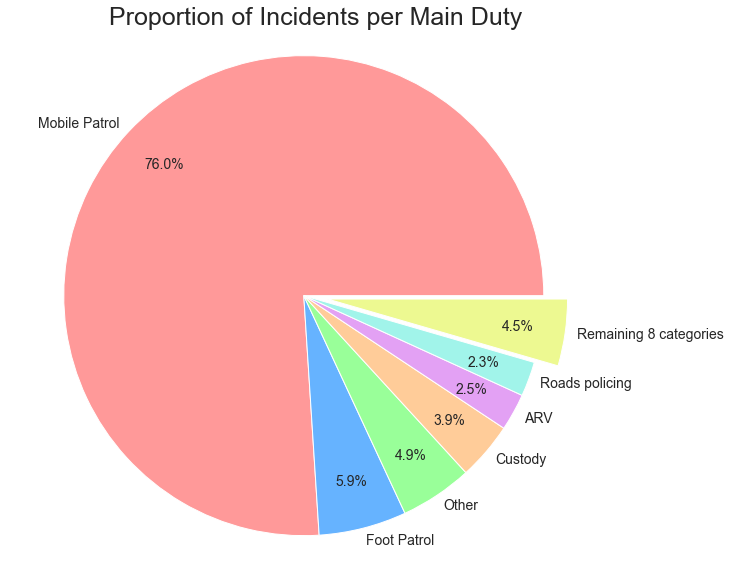

In [41]:
# Pie chart
pie, ax = plt.subplots(figsize = (10, 8))
labels = piechart['duty']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e3a1f4', '#a1f4ea', '#edf991']
plt.pie(x = piechart['totals'], autopct="%.1f%%", explode=(0, 0, 0, 0, 0, 0, .05), labels=labels, pctdistance=0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 14}, radius = 0.5)
plt.title("Proportion of Incidents per Main Duty", fontsize=25)
ax.axis('equal')
plt.tight_layout()

# Analyze Main Duties per Incidents where force is Required

In [42]:
dutyforce = data[['MainDuty: AFO',
'MainDuty: ARV',
'MainDuty: CID',
'MainDuty: CTSFO',
'MainDuty: Custody',
'MainDuty: Dog handler duty',
'MainDuty: Foot patrol',
'MainDuty: Mobile patrol',
'MainDuty: Mounted section duties',
'MainDuty: Off duty',
'MainDuty: Other',
'MainDuty: PSU/Public order',
'MainDuty: Roads policing',
'MainDuty: Surveillance',
'Was Force Needed?']]
dutyforce.head()

,MainDuty: AFO,MainDuty: ARV,MainDuty: CID,MainDuty: CTSFO,MainDuty: Custody,MainDuty: Dog handler duty,MainDuty: Foot patrol,MainDuty: Mobile patrol,MainDuty: Mounted section duties,MainDuty: Off duty,MainDuty: Other,MainDuty: PSU/Public order,MainDuty: Roads policing,MainDuty: Surveillance,Was Force Needed?
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [43]:
dutyforce = dutyforce.loc[dutyforce['Was Force Needed?'] == 1]
dutyforce

,MainDuty: AFO,MainDuty: ARV,MainDuty: CID,MainDuty: CTSFO,MainDuty: Custody,MainDuty: Dog handler duty,MainDuty: Foot patrol,MainDuty: Mobile patrol,MainDuty: Mounted section duties,MainDuty: Off duty,MainDuty: Other,MainDuty: PSU/Public order,MainDuty: Roads policing,MainDuty: Surveillance,Was Force Needed?
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
147886,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
147887,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
147890,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [44]:
dutyforce['Was Force Needed?'].value_counts()

1    67950
Name: Was Force Needed?, dtype: int64

In [45]:
dutyforce = dutyforce.drop(columns = ['Was Force Needed?'])
for i in dutyforce.columns:
    print(i)

MainDuty: AFO
MainDuty: ARV
MainDuty: CID
MainDuty: CTSFO
MainDuty: Custody
MainDuty: Dog handler duty
MainDuty: Foot patrol
MainDuty: Mobile patrol
MainDuty: Mounted section duties
MainDuty: Off duty
MainDuty: Other
MainDuty: PSU/Public order
MainDuty: Roads policing
MainDuty: Surveillance


In [49]:
dutyforce.shape

(67950, 14)

In [51]:
totals = []
names = []
for i in dutyforce.columns:
    names.append(i)
    totals.append(np.sum(dutyforce[i]))

duty_forcet = pd.DataFrame(data = [names,totals]).T
duty_forcet.rename(columns = {0: 'duty', 1:'totals'}, inplace = True)
duty_forcet.sort_values(by = 'totals', ascending = False, inplace = True)
duty_forcet['duty'] = duty_forcet['duty'].map({
                                            'MainDuty: AFO': 'AFO',
                                        'MainDuty: ARV': 'ARV',
                                        'MainDuty: CID': 'CID',
                                        'MainDuty: CTSFO': 'CTSFO',
                                        'MainDuty: Custody': 'Custody',
                                        'MainDuty: Dog handler duty': 'Dog handler duty',
                                        'MainDuty: Foot patrol': 'Foot Patrol',
                                        'MainDuty: Mobile patrol': 'Mobile Patrol',
                                        'MainDuty: Mounted section duties': 'Mounted section duties',
                                        'MainDuty: Off duty': 'Off Duty',
                                        'MainDuty: Other': 'Other',
                                        'MainDuty: PSU/Public order': 'PSU/Public Order',
                                        'MainDuty: Roads policing': 'Roads policing',
                                        'MainDuty: Surveillance': 'Surveillance'
                                        })
duty_forcet

,duty,totals
7,Mobile Patrol,48498
4,Custody,5258
6,Foot Patrol,3412
10,Other,3079
1,ARV,2707
11,PSU/Public Order,2109
12,Roads policing,1165
2,CID,414
5,Dog handler duty,399
3,CTSFO,324


In [55]:
piechart = duty_totals.iloc[:6,:]
piechart = piechart.append({'duty': 'Remaining 8 categories', 'totals': 2887}, ignore_index = True)
piechart

,duty,totals
0,Mobile Patrol,112431
1,Foot Patrol,8736
2,Other,7214
3,Custody,5741
4,ARV,3690
5,Roads policing,3443
6,Remaining 8 categories,2887


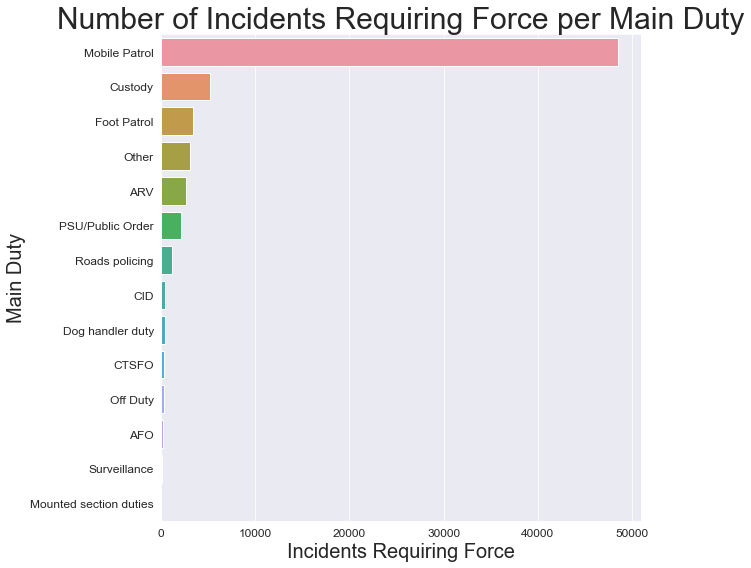

In [53]:
plt.figure(figsize=(10,8))
ax = sns.set_style('darkgrid')
ax = sns.barplot(y = duty_forcet['duty'], x = duty_forcet['totals'])
ax.set_ylabel('Main Duty', fontsize = 20)
ax.set_xlabel('Incidents Requiring Force', fontsize = 20)
ax.axes.set_title('Number of Incidents Requiring Force per Main Duty', fontsize = 30)
plt.xticks()
plt.tick_params(labelsize = 12)
plt.tight_layout()

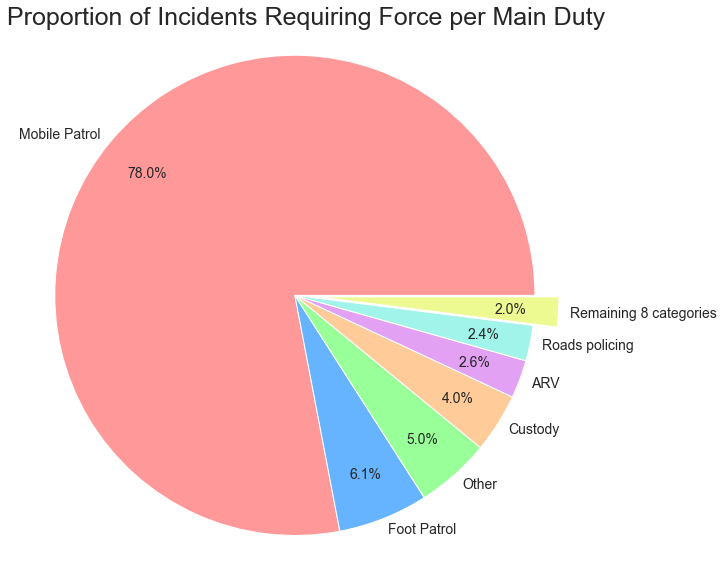

In [56]:
# Pie chart
pie, ax = plt.subplots(figsize = (10, 8))
labels = piechart['duty']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e3a1f4', '#a1f4ea', '#edf991']
plt.pie(x = piechart['totals'], autopct="%.1f%%", explode=(0, 0, 0, 0, 0, 0, .05), labels=labels, pctdistance=0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 14}, radius = 0.5)
plt.title("Proportion of Incidents Requiring Force per Main Duty", fontsize=25)
ax.axis('equal')
plt.tight_layout()